<a href="https://colab.research.google.com/github/Aryan-R/P8_Kaggle_nov/blob/main/P8_02_FE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/P8')
from my_functions import *

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/P8/train.csv', index_col='id')
train

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.106643,3.594370,132.8040,3.184280,0.081971,1.18859,3.732380,2.266270,2.099590,0.012330,1.607190,-0.318058,0.560137,2.806880,1.351140,2.535930,0.197527,0.676494,1.989790,-3.842450,0.037380,0.230322,3.33055,0.009397,0.144738,3.051310,1.303620,0.033225,-0.018284,2.748210,-0.009294,-0.036271,-0.049871,0.019484,3.898460,11.28630,1.138020,3.366880,4.94446,-0.105772,...,-0.027551,0.019483,-0.048826,0.050748,3.729300,5.017440,4.186880,0.063342,0.121043,1.37175,4.017450,0.167613,0.039754,2.042360,-0.016614,0.107679,3.507250,0.013660,-0.097023,5.396070,0.244457,3.49184,0.113090,-0.015472,4.208790,4.106560,0.037227,-0.118814,0.067086,0.010739,1.098620,0.013331,-0.011715,0.052759,0.065400,4.211250,1.978770,0.085974,0.240496,0
1,0.125021,1.673360,76.5336,3.378250,0.099400,5.09366,1.275620,-0.471318,4.545940,0.037706,0.331749,0.325091,0.062040,2.262150,4.339430,-0.224999,0.233586,3.381280,1.902990,0.067874,-0.051268,0.006135,2.60444,0.103441,0.067638,4.753620,1.855520,-0.181834,0.008359,3.166340,0.011850,0.022292,0.069320,0.117109,0.315276,24.48070,1.672270,-0.409067,4.95475,0.092358,...,-0.010841,0.064584,0.102548,0.093611,0.964089,0.630422,4.307340,0.091289,-0.036360,3.61767,3.103240,0.000657,0.051302,1.924620,0.123294,-0.022671,1.548120,-0.010397,0.058330,3.661310,-0.118386,2.35739,-0.009112,0.178701,4.097350,3.532890,0.005244,0.121381,0.109968,0.135838,3.460170,0.017054,0.124863,0.154064,0.606848,-0.267928,2.577860,-0.020877,0.024719,0
2,0.036330,1.497470,233.5460,2.194350,0.026914,3.12694,5.056870,3.849460,1.801870,0.056995,0.328684,2.968810,0.105244,2.069490,5.309860,1.354790,-0.262018,1.379080,1.480910,0.020542,-0.008806,0.109348,1.68365,0.038180,0.123716,1.112480,3.571660,0.120601,0.082069,2.233520,0.002270,0.045182,0.014405,0.011599,-0.502849,33.73820,1.417500,1.071350,3.22296,2.122030,...,0.027571,-0.007121,-0.048914,-0.002574,1.865090,2.404170,0.411741,0.057749,0.525174,2.16879,0.828297,0.089848,0.093744,4.949010,-0.010978,0.076671,0.266784,0.038691,0.382731,3.847600,-0.121482,3.74084,0.147098,-0.016566,0.614651,2.125840,0.078828,0.979808,0.026758,0.117310,4.883000,0.085222,0.032396,0.116092,-0.001689,-0.520069,2.141120,0.124464,0.148209,0
3,-0.014077,0.246000,779.9670,1.890640,0.006948,1.53112,2.698000,4.517330,4.503320,0.123494,1.002680,4.869600,0.058411,2.497850,1.238430,2.348360,0.175475,1.608890,2.028810,0.042086,0.005141,0.076506,1.65122,0.111813,0.121641,0.589120,4.236920,-0.032843,0.058168,0.712927,0.097465,0.072744,0.000324,0.063362,4.063820,25.38240,0.576572,2.026210,2.96843,1.085670,...,0.110884,0.026837,2.931160,0.068112,-0.495192,1.345280,2.242750,0.035611,-0.139274,4.74243,3.292740,0.117877,0.065605,0.556711,-0.058029,0.070501,1.101250,0.068559,0.162928,4.070180,-0.008835,3.89678,0.913739,-0.163204,3.074850,4.356780,-0.048894,4.917990,0.069930,-0.015347,3.474390,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.968600,0.040017,0.044873,0
4,-0.003259,3.715420,156.1280,2.147720,0.018284,2.09859,4.154920,-0.038236,3.371450,0.034166,0.711483,0.769988,0.057555,0.957257,3.711450,5.464350,0.287104,2.616950,1.384030,0.074883,-0.010543,0.109121,2.27602,0.008023,0.045236,4.359540,5.075620,-0.009376,0.528966,4.053350,0.020000,0.106828,0.051307,0.045939,3.402460,15.56150,1.635960,0.047029,4.01771,0.155748,...,0.075586,0.032114,-0.042284,0.047974,-0.294184,5.065600,1.050290,0.034019,0.024611,3.12578,2.262840,0.082462,-0.023296,5.615850,0.086238,0.157568,3.725670,0.061247,0.086603,0.607246,1.411090,2.06062,-0.023154,0.011234,2.155530,0.914518,0.044521,0.375731,0.134351,0.013781,1.910590,-0.042943,0.105616,0.125072,0.037509,1.043790,

In [ ]:
X= train.drop('target',axis=1)
y= train['target']

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scale = RobustScaler().fit(X)
X_scaled = std_scale.transform(X)

# Feature Selection

Correlation Method :
target    1.000000
f34       0.135270
f55       0.113889
f43       0.109418
f71       0.107687
f80       0.106964
f91       0.106120
f8        0.105724
f27       0.101346
Name: target, dtype: float64

Embedded Method :
Best alpha using built-in LassoCV: 0.000221
Best score using built-in LassoCV: 0.158915
Lasso picked 99 variables and eliminated the other 2 variables


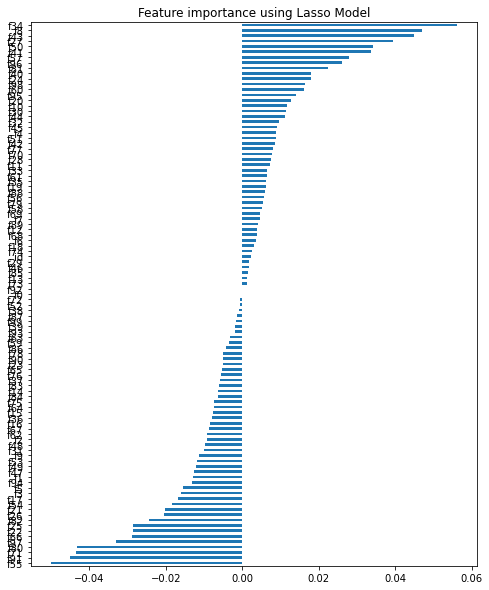

f55   -0.050054
f91   -0.045114
f71   -0.043570
f80   -0.043104
f97   -0.033055
         ...   
f50    0.034171
f27    0.039425
f43    0.044993
f8     0.047054
f34    0.056109
Length: 101, dtype: float64

Méthode RFE (Recursive Feature Elimination):
Optimum number of features: 12
Score with 12 features: 0.111817
Variables selectionnées: 
Index(['f8', 'f27', 'f34', 'f41', 'f43', 'f50', 'f55', 'f71', 'f80', 'f91'], dtype='object')


In [ ]:
feat_select(train, 'target', X.columns, [],thresh=0.1)

## Passage au log

In [ ]:
for e in ['f8', 'f27', 'f34', 'f41', 'f43', 'f50', 'f55', 'f71', 'f80', 'f91']:
    train[e]= train[e].apply(lambda x: np.log(x))

In [ ]:
train

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.106643,3.594370,132.8040,3.184280,0.081971,1.18859,3.732380,2.266270,0.741742,0.012330,1.607190,-0.318058,0.560137,2.806880,1.351140,2.535930,0.197527,0.676494,1.989790,-3.842450,0.037380,0.230322,3.33055,0.009397,0.144738,3.051310,1.303620,-3.404465,-0.018284,2.748210,-0.009294,-0.036271,-0.049871,0.019484,1.360582,11.28630,1.138020,3.366880,4.94446,-0.105772,...,-0.027551,0.019483,-0.048826,0.050748,3.729300,5.017440,4.186880,0.063342,0.121043,1.37175,1.390647,0.167613,0.039754,2.042360,-0.016614,0.107679,3.507250,0.013660,-0.097023,1.685671,0.244457,3.49184,0.113090,-0.015472,4.208790,4.106560,0.037227,-0.118814,0.067086,0.010739,0.094055,0.013331,-0.011715,0.052759,0.065400,4.211250,1.978770,0.085974,0.240496,0
1,0.125021,1.673360,76.5336,3.378250,0.099400,5.09366,1.275620,-0.471318,1.514235,0.037706,0.331749,0.325091,0.062040,2.262150,4.339430,-0.224999,0.233586,3.381280,1.902990,0.067874,-0.051268,0.006135,2.60444,0.103441,0.067638,4.753620,1.855520,NaN,0.008359,3.166340,0.011850,0.022292,0.069320,0.117109,-1.154307,24.48070,1.672270,-0.409067,4.95475,0.092358,...,-0.010841,0.064584,0.102548,0.093611,0.964089,0.630422,4.307340,0.091289,-0.036360,3.61767,1.132447,0.000657,0.051302,1.924620,0.123294,-0.022671,1.548120,-0.010397,0.058330,1.297821,-0.118386,2.35739,-0.009112,0.178701,4.097350,3.532890,0.005244,0.121381,0.109968,0.135838,1.241318,0.017054,0.124863,0.154064,0.606848,-0.267928,2.577860,-0.020877,0.024719,0
2,0.036330,1.497470,233.5460,2.194350,0.026914,3.12694,5.056870,3.849460,0.588825,0.056995,0.328684,2.968810,0.105244,2.069490,5.309860,1.354790,-0.262018,1.379080,1.480910,0.020542,-0.008806,0.109348,1.68365,0.038180,0.123716,1.112480,3.571660,-2.115268,0.082069,2.233520,0.002270,0.045182,0.014405,0.011599,NaN,33.73820,1.417500,1.071350,3.22296,2.122030,...,0.027571,-0.007121,-0.048914,-0.002574,1.865090,2.404170,0.411741,0.057749,0.525174,2.16879,-0.188383,0.089848,0.093744,4.949010,-0.010978,0.076671,0.266784,0.038691,0.382731,1.347450,-0.121482,3.74084,0.147098,-0.016566,0.614651,2.125840,0.078828,0.979808,0.026758,0.117310,1.585760,0.085222,0.032396,0.116092,-0.001689,-0.520069,2.141120,0.124464,0.148209,0
3,-0.014077,0.246000,779.9670,1.890640,0.006948,1.53112,2.698000,4.517330,1.504815,0.123494,1.002680,4.869600,0.058411,2.497850,1.238430,2.348360,0.175475,1.608890,2.028810,0.042086,0.005141,0.076506,1.65122,0.111813,0.121641,0.589120,4.236920,NaN,0.058168,0.712927,0.097465,0.072744,0.000324,0.063362,1.402123,25.38240,0.576572,2.026210,2.96843,1.085670,...,0.110884,0.026837,2.931160,0.068112,-0.495192,1.345280,2.242750,0.035611,-0.139274,4.74243,1.191720,0.117877,0.065605,0.556711,-0.058029,0.070501,1.101250,0.068559,0.162928,1.403687,-0.008835,3.89678,0.913739,-0.163204,3.074850,4.356780,-0.048894,4.917990,0.069930,-0.015347,1.245419,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.968600,0.040017,0.044873,0
4,-0.003259,3.715420,156.1280,2.147720,0.018284,2.09859,4.154920,-0.038236,1.215343,0.034166,0.711483,0.769988,0.057555,0.957257,3.711450,5.464350,0.287104,2.616950,1.384030,0.074883,-0.010543,0.109121,2.27602,0.008023,0.045236,4.359540,5.075620,NaN,0.528966,4.053350,0.020000,0.106828,0.051307,0.045939,1.224499,15.56150,1.635960,0.047029,4.01771,0.155748,...,0.075586,0.032114,-0.042284,0.047974,-0.294184,5.065600,1.050290,0.034019,0.024611,3.12578,0.816621,0.082462,-0.023296,5.615850,0.086238,0.157568,3.725670,0.061247,0.086603,-0.498821,1.411090,2.06062,-0.023154,0.011234,2.155530,0.914518,0.044521,0.375731,0.134351,0.013781,0.647412,-0.042943,0.105616,0.125072,0.037509,1.043790,1.074810,-0.012819,

# KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km= KMeans(n_clusters=4)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
pd.DataFrame(km.labels_).value_counts()

1    298685
2    290085
0      6065
3      5165
dtype: int64

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
names = X.index
features = X.columns
color= [y.values]

In [ ]:
model = PCA(n_components= 2)
model.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

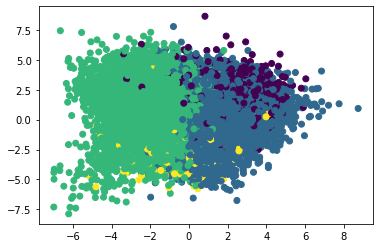

In [ ]:
x_pca= model.transform(X_scaled)

plt.scatter(x_pca[:,0],x_pca[:,1],c=km.labels_)
plt.show()

# Modélisations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve

In [ ]:
X_model= pd.DataFrame(X_scaled,index= X.index, columns= X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y,test_size=0.2, random_state=0)

## Regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

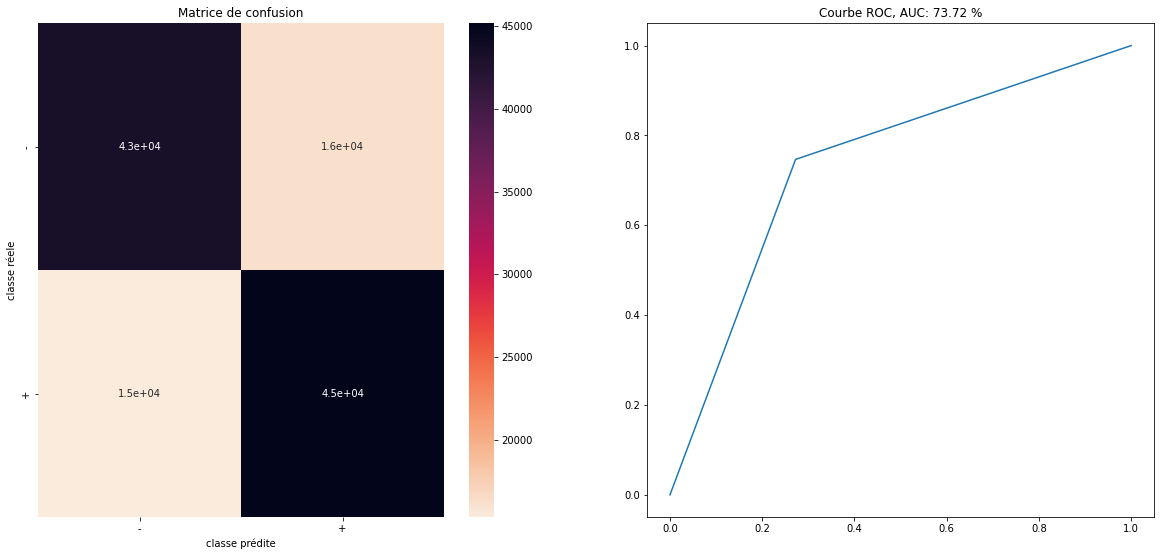

Model results: 

  - Accuracy:73.72 %
  - Precision:73.61 %
  - Recall:74.66 %
  - F1 score:74.13 % 



In [ ]:
y_pred= pd.DataFrame(model.predict(X_test))
y_pred= Binarizer(threshold=0.5, copy=False).fit_transform(y_pred)
y_pred= pd.DataFrame(y_pred, index= X_test.index).astype('int')
analyse_results(y_test['target'], y_pred[0])

## Deep Learning - Amélioration et modèle final

Etant donné que le DL est le modèle nous donnant les meilleures performances, nous allons tester un modèle plus profond afin de tendre vers 0.75 d'AUC.

Pour ce faire nous allons tester le modèle de MARCIN PIETRZYCKI - https://www.kaggle.com/jmcslk/tps-nov-21-dnn-cnn-model-extras#Feature-Engineering

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import regularizers
from keras import metrics

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(8)
np.random.seed(8)

In [ ]:
def dnn_model():
    x_input = layers.Input(shape=(100,))
    
    x1 = layers.Dense(units=386, activation='swish')(x_input)
    x1 = layers.BatchNormalization()(x1)
    x2 = layers.Dropout(rate=0.45)(x1)
    
    x2 = layers.Dense(units=192, activation='swish')(x2)
    x2 = layers.BatchNormalization()(x2)
    x3 = layers.Dropout(rate=0.35)(x2)
    
    x3 = layers.Dense(units=98, activation='swish')(x3)
    x3 = layers.BatchNormalization()(x3)
    x3 = layers.Dropout(rate=0.25)(x3)
    
    x4 = layers.Dense(units=192, activation='swish')(x3)
    x4 = layers.BatchNormalization()(x4)
    x4 = layers.Multiply()([x2, x4])
    x4 = layers.Dropout(rate=0.35)(x4)
    
    x5 = layers.Dense(units=386, activation='swish')(x4)
    x5 = layers.BatchNormalization()(x5)
    x5 = layers.Multiply()([x1, x5])
    x5 = layers.Dropout(rate=0.45)(x5)
    
    x_e1 = layers.Concatenate()([x3, x5])
    x = layers.Reshape((22, 22, 1))(x_e1)
    
    x = layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='swish')(x)#16
    x = layers.AveragePooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, kernel_size=(3, 3), padding='same', activation='swish')(x)#8
    x = layers.AveragePooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, kernel_size=(3, 3), padding='same', activation='swish')(x)#8
    
    enc = layers.AveragePooling2D((2, 2), padding='same')(x)
    
    flat = layers.Flatten()(enc)
    
    x = layers.Concatenate()([x_e1, flat])
    
    x = layers.Dense(units=128, activation='swish')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.25)(x)
    
    x_output = layers.Dense(units=1, activation='sigmoid')(x)

    model = models.Model(inputs=x_input, outputs=x_output, 
                  name='DNN_Model')
    return model

In [ ]:
model = dnn_model()
model.summary()

Model: "DNN_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 386)          38986       ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 386)         1544        ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 386)          0           ['batch_normalization[0][

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer= Adam(learning_rate= 0.1), 
                      loss="binary_crossentropy", 
                      metrics='accuracy')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'baseline_model.h5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    period=1
)

earlystop = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto',
    restore_best_weights= True
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduceLR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint, earlystop, csvlogger,reduceLR]

In [ ]:
validation_split=10000
x_validation=X_train[:validation_split]
x_partial_train=X_train[validation_split:]
y_validation=y_train[:validation_split]
y_partial_train=y_train[validation_split:]

In [ ]:
nb_train_samples= len(x_partial_train)
nb_valid_samples= len(x_validation)
batch_size= 2048

model.fit(x_partial_train,y_partial_train,
          epochs= 400,
          steps_per_epoch = nb_train_samples//batch_size,
          batch_size= batch_size,
          validation_data=(x_validation,y_validation),
          validation_steps = nb_valid_samples//batch_size,
          verbose = 1,
          callbacks = callbacks,
          shuffle = True)

Epoch 1/400
227/229 [============================>.] - ETA: 0s - loss: 0.6212 - accuracy: 0.6854
Epoch 00001: val_accuracy improved from -inf to 0.73096, saving model to baseline_model.h5
229/229 [==============================] - 9s 20ms/step - loss: 0.6209 - accuracy: 0.6857 - val_loss: 0.5993 - val_accuracy: 0.7310 - lr: 0.1000
Epoch 2/400
  1/229 [..............................] - ETA: 14s - loss: 0.5831 - accuracy: 0.7312

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.


228/229 [============================>.] - ETA: 0s - loss: 0.5849 - accuracy: 0.7285
Epoch 00002: val_accuracy improved from 0.73096 to 0.73828, saving model to baseline_model.h5
229/229 [==============================] - 4s 18ms/step - loss: 0.5849 - accuracy: 0.7285 - val_loss: 0.5718 - val_accuracy: 0.7383 - lr: 0.1000
Epoch 3/400
228/229 [============================>.] - ETA: 0s - loss: 0.5850 - accuracy: 0.7309
Epoch 00003: val_accuracy improved from 0.73828 to 0.73950, saving model to baseline_model.h5
229/229 [==============================] - 4s 18ms/step - loss: 0.5850 - accuracy: 0.7310 - val_loss: 0.6011 - val_accuracy: 0.7395 - lr: 0.1000
Epoch 4/400
227/229 [============================>.] - ETA: 0s - loss: 0.5875 - accuracy: 0.7323
Epoch 00004: val_accuracy did not improve from 0.73950
229/229 [==============================] - 4s 18ms/step - loss: 0.5874 - accuracy: 0.7324 - val_loss: 0.5726 - val_accuracy: 0.7375 - lr: 0.1000
Epoch 5/400
228/229 [======================

In [ ]:
print("score on train: "+ str(model.evaluate(X_train,y_train)[1]))
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))

15000/15000 [==============================] - 47s 3ms/step - loss: 0.5626 - accuracy: 0.7483
score on train: 0.7482916712760925
3750/3750 [==============================] - 12s 3ms/step - loss: 0.5642 - accuracy: 0.7475
score on test: 0.7474916577339172


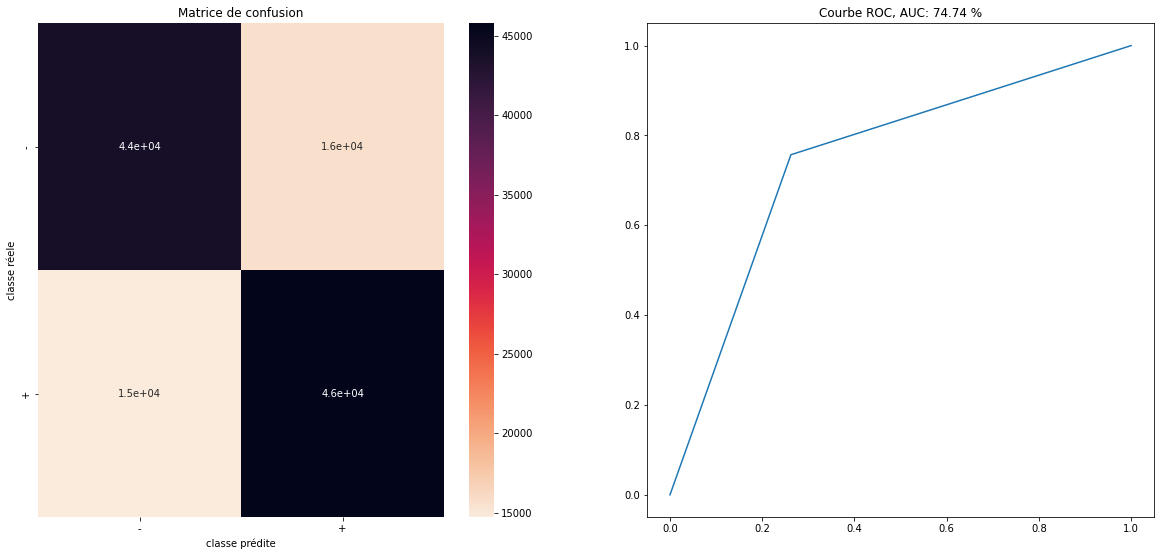

Model results: 

  - Accuracy:74.75 %
  - Precision:74.6 %
  - Recall:75.7 %
  - F1 score:75.14 % 



In [ ]:
y_pred= pd.DataFrame(model.predict(X_test))
y_pred= Binarizer(threshold=0.5, copy=False).fit_transform(y_pred)
y_pred= pd.DataFrame(y_pred, index= X_test.index).astype('int')
analyse_results(y_test, y_pred[0])

In [ ]:
pip install shap

     |████████████████████████████████| 371 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509236 sha256=c2df1feca71bdaf92007971421653400c632e610b72be9320f1e077faebeaa26
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap

In [ ]:
explainer = shap.KernelExplainer(model, shap.sample(np.array(X_test),10))
shap_values = explainer.shap_values(X_test[:5])

  0%|          | 0/5 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

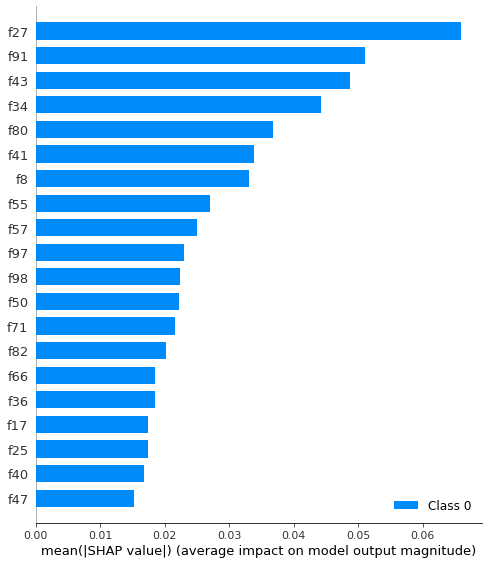

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[280:330,:])

# Pred submissions

In [ ]:
sample= pd.read_csv('/content/drive/MyDrive/P8/sample_submission.csv')
sample

,id,target
0,600000,0.5
1,600001,0.5
2,600002,0.5
3,600003,0.5
4,600004,0.5
...,...,...
539995,1139995,0.5
539996,1139996,0.5
539997,1139997,0.5
539998,1139998,0.5


In [ ]:
test= pd.read_csv('/content/drive/MyDrive/P8/test.csv',index_col='id')
test

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
600000,0.003229,4.838660,585.5290,2.282910,0.713180,3.907830,0.480696,1.482270,4.891810,0.056351,4.200990,3.151800,0.000349,1.851160,2.63889,0.746668,-0.004756,1.610300,4.11482,-0.077756,0.129446,0.053324,0.416789,0.445009,0.150464,5.021300,2.221390,-0.072333,-0.215874,1.56236,0.074880,0.010050,0.018582,0.067466,5.578300,3.08556,3.842470,0.011125,2.35997,0.695092,...,0.027517,0.048825,0.074626,0.041264,0.069319,4.248810,2.09195,0.695042,0.007464,-0.017882,1.883500,1.268030,0.023747,0.043071,3.174780,0.074356,0.125909,3.926430,0.046914,-0.042290,3.019250,0.089564,3.20070,0.009679,-0.099653,3.573060,4.79727,0.091985,0.773543,0.073380,0.112910,1.073550,0.122149,0.086330,0.036010,0.010619,0.290343,1.898200,0.131533,0.012047
600001,0.008602,0.505536,-100.0990,3.012670,0.027199,1.194610,5.036620,2.517440,4.553890,0.063876,0.337257,4.439690,0.013188,3.379010,3.38470,1.167400,2.246550,1.750170,2.76624,-0.058501,0.012595,0.036144,0.769057,0.017496,0.050283,0.324697,4.948640,0.124789,0.347128,1.24512,0.035822,-0.013188,0.023194,0.006444,4.983330,23.70690,8.287290,4.796230,1.79928,-0.050040,...,0.067650,0.066438,0.034258,0.606144,0.019988,-0.456704,3.37877,1.900050,0.052316,-0.050397,2.612950,3.112540,0.022305,0.108325,4.617640,0.091440,0.039368,3.035190,1.023050,-0.020578,2.771560,3.309480,5.05840,-0.003993,0.067636,0.995391,2.47165,-0.015214,0.263423,-0.021910,-0.020214,2.622340,0.123307,0.033063,0.123059,0.005771,-0.392923,3.689640,0.047418,0.120015
600002,1.461000,2.437260,-112.9640,3.541230,0.752338,4.338310,1.648080,4.699910,1.950250,0.005303,2.071680,0.546499,0.141781,1.673170,4.30649,1.702330,-0.062869,1.619230,4.19053,0.055140,-0.016590,0.017805,3.064810,0.070370,0.098316,3.507540,1.069100,0.012750,0.009981,3.46781,0.035920,-0.009804,0.065728,-0.004725,5.281020,11.52880,0.171694,4.394570,2.52084,0.079365,...,0.065172,-0.003328,-0.001950,0.095007,0.080267,3.337300,3.60489,4.694580,0.075650,-0.088276,1.772440,-0.142226,0.000918,0.021483,0.241844,0.067591,-0.026572,0.894909,0.111606,0.524423,1.450070,0.019355,1.27135,0.076042,0.446993,4.406990,2.44697,-0.041154,0.212414,0.141005,-0.011036,2.030180,-0.000426,0.084091,0.123605,0.499554,4.054650,3.330670,0.108843,0.064687
600003,0.140556,3.085610,179.4510,0.573945,0.057342,2.216790,1.623480,0.526174,1.542540,-0.026161,1.609440,1.723560,-0.019564,1.552130,4.83264,1.501640,0.192669,4.614890,1.47069,-0.010031,0.072805,0.048035,3.230210,-0.031548,0.028697,3.752520,4.948470,-0.174542,-0.033491,2.47823,0.068129,0.090797,0.029877,0.146718,3.169830,-12.98460,3.135210,1.765010,3.25399,0.713238,...,0.075775,-0.008900,0.141776,0.173123,0.012894,3.390590,2.69899,0.059916,0.055400,-0.000140,2.641440,0.839721,-0.026268,0.058745,2.521910,0.118737,0.134899,2.839480,0.108751,-0.015848,1.147240,0.390064,3.30923,-0.046117,-0.206052,2.373770,3.15941,0.131234,1.031180,0.026155,0.050117,0.221613,0.045298,0.129966,0.004015,0.018279,2.696580,-0.533491,0.052524,0.011058
600004,0.128876,5.199760,107.4660,-0.497149,0.080220,0.458121,0.629839,5.240460,-0.232279,0.030006,0.481359,2.176020,0.193162,1.392090,2.51890,2.993170,4.170910,0.318375,4.84563,0.085064,0.026443,-0.004559,0.120327,-0.008630,0.004495,4.921700,1.685640,0.095628,0.189131,2.56955,0.046643,0.111462,0.002912,0.060737,4.253000,38.70340,0.170825,-0.598784,3.92796,0.262956,...,0.123505,0.011181,0.152410,0.118767,-0.054951,4.841230,3.39522,3.737320,0.053328,0.143619,-0.156581,-0.257201,0.987785,0.038284,2.765120,0.040994,0.173981,1.112190,-0.030675,0.137178,1.550140,0.401083,1.74053,0.096331,0.445268,4.392460,2.52818,-0.037385,0.117148,-0.010128,0.058860,2.6604

In [ ]:
test_scaled = std_scale.transform(test)
y_pred= pd.DataFrame(model.predict(test_scaled))
y_pred= Binarizer(threshold=0.5, copy=False).fit_transform(y_pred)
pred1= pd.DataFrame(test.index.values,columns=['id'])
pred2= pd.DataFrame(y_pred, columns=['target'],dtype='int')
pred= pd.concat([pred1,pred2],axis=1)
pred

,id,target
0,600000,1
1,600001,1
2,600002,1
3,600003,0
4,600004,1
...,...,...
539995,1139995,1
539996,1139996,1
539997,1139997,1
539998,1139998,1


In [ ]:
pred.to_csv('/content/drive/MyDrive/P8/submission6.csv', index=False)